In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline

import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers  # TF model

In [2]:
%store -r train_features_without_usage
%store -r test_features_without_usage

%store -r train_labels_without_usage
%store -r test_labels_without_usage

train_features = train_features_without_usage
test_features = test_features_without_usage

train_labels = train_labels_without_usage
test_labels = test_labels_without_usage

The tf.keras.layers.Normalization adding a feature normalization into the model.

Create the layer

In [3]:
normalizer = tf.keras.layers.Normalization(axis=-1)

Fit the state of the preprocessing layer to the data

In [4]:
normalizer.adapt(np.array(train_features))

2022-06-16 15:58:40.526294: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /sw/arch/Debian10/EB_production/2021/software/Qhull/2020.2-GCCcore-10.3.0/lib:/sw/arch/Debian10/EB_production/2021/software/SciPy-bundle/2021.05-foss-2021a/lib/python3.9/site-packages/numpy/core/lib:/sw/arch/Debian10/EB_production/2021/software/PyTorch/1.10.0-foss-2021a-CUDA-11.3.1/lib/python3.9/site-packages/torch/lib:/sw/arch/Debian10/EB_production/2021/software/magma/2.6.1-foss-2021a-CUDA-11.3.1/lib:/sw/arch/Debian10/EB_production/2021/software/FFmpeg/4.3.2-GCCcore-10.3.0/lib:/sw/arch/Debian10/EB_production/2021/software/FriBidi/1.0.10-GCCcore-10.3.0/lib:/sw/arch/Debian10/EB_production/2021/software/x265/3.5-GCCcore-10.3.0/lib:/sw/arch/Debian10/EB_production/2021/software/LAME/3.100-GCCcore-10.3.0/lib:/sw/arch/Debian10/EB_production/2021/software/x2

Calculating the mean and variance, and storing them in the layer:

In [5]:
print(normalizer.mean.numpy())

first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print()
    print('Normalized:', normalizer(first).numpy())

[[4.5719843e+00 8.5137823e+02 7.1319043e+02 5.0751388e-01 5.8288473e-01]]
First example: [[   0 1373 1144    1    1]]

Normalized: [[-0.09  1.05  0.31  0.99  0.85]]


# 2. Linear Regression (multiple input)

In [6]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [7]:
linear_model.predict(train_features[:10])
linear_model.layers[1].kernel

<tf.Variable 'dense/kernel:0' shape=(5, 1) dtype=float32, numpy=
array([[ 0.0183804 ],
       [ 0.02610636],
       [-0.33416343],
       [-0.9515903 ],
       [-0.0503087 ]], dtype=float32)>

Mean Absolute Error

In [8]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss=tf.keras.losses.MeanAbsoluteError())

Mean Squared Error

In [ ]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss=tf.keras.losses.MeanSquaredError())

In [9]:
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split=0.2)

In [10]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    # plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [TotalVotes]')
    plt.legend()
    plt.grid(True)

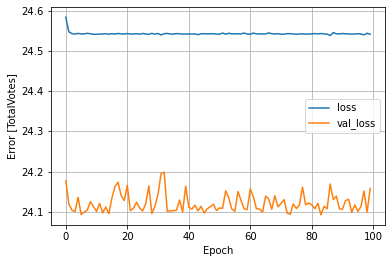

In [11]:
plot_loss(history)
plt.show()

Mean Absolute Error

In [14]:
test_results = {}
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

Mean Squared Error

In [357]:
test_results_MSE['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

In [15]:
pd.DataFrame(test_results, index=['Mean absolute error [TotalVotes]']).T


,Mean absolute error [TotalVotes]
linear_model,24.516874
